In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

df_washington = pd.read_csv("data/washington.csv", sep = ";")
# df_convention = pd.read_csv("data/convention.csv", sep = ";")
# df_sts = pd.read_csv("data/sts.csv", sep = ";")

def filter(df,amont,aval):
    df = df[df["Libelle noeud amont"]==amont]
    df = df[df["Libelle noeud aval"]==aval]
    return df

def set_date(df):
    df["Date et heure de comptage"] = pd.to_datetime(df_washington["Date et heure de comptage"],format='%Y-%m-%dT%H:%M:%S%z')
    return df


df_washington = filter(df_washington,"Av_Champs_Elysees-Washington","Av_Champs_Elysees-Berri")
df_washington = set_date(df_washington)
df_washington = df_washington.sort_values(by = "Date et heure de comptage")
df_washington = df_washington.interpolate() #remove Nan by interpolation
df_washington = df_washington.reset_index()
df_washington["date"] = [d.date() for d in df_washington["Date et heure de comptage"]]
# df_sts = filter(df_sts,"Lecourbe-Convention","Convention-Blomet")
# df_convention = filter(df_convention,"Sts_Peres-Voltaire","Sts_Peres-Universite")
df_washington["hour"]= [d.hour for d in df_washington["Date et heure de comptage"]]
df_washington["weekday"]= [d.weekday() for d in df_washington["Date et heure de comptage"]]
df_washington.head(1)

,index,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,date,hour,weekday
0,6712,4264,AV_Champs_Elysees,2019-11-01 04:00:00+01:00,746.0,10.98889,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2019-11-01,4,4


In [ ]:
df_washington["temps/voiture"] = 100 * df_washington["Taux d'occupation"] / df_washington["Débit horaire"]

In [18]:
df_grouped = df_washington.groupby(by=["weekday", "hour"]).mean().reset_index().drop(columns=["Identifiant noeud aval", "Identifiant noeud amont", "Identifiant arc", "index"])
df_grouped["temps/voiture"] = 100 * df_grouped["Taux d'occupation"] / df_grouped["Débit horaire"]
df_grouped["cost"] = np.where((df_grouped["hour"] <=8) | (df_grouped["hour"] >=21), 14 * df_grouped["temps/voiture"], 10 * df_grouped["temps/voiture"])

In [19]:
df_grouped

,weekday,hour,Débit horaire,Taux d'occupation,temps/voiture,cost
0,0,0,569.508772,8.959505,1.573199,22.024782
1,0,1,482.142857,7.442561,1.543642,21.610991
2,0,2,371.339286,6.594287,1.775812,24.861365
3,0,3,277.142857,4.694803,1.694001,23.716016
4,0,4,191.500000,2.622689,1.369551,19.173709
...,...,...,...,...,...,...
163,6,19,796.070175,18.765707,2.357293,23.572930
164,6,20,766.824561,16.595966,2.164245,21.642455
165,6,21,695.122807,14.010888,2.015599,28.218385
166,6,22,659.526316,12.216931,1.852380,25.933314


<AxesSubplot:xlabel='hour', ylabel='temps/voiture'>

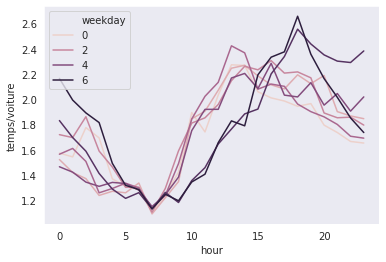

In [22]:
sns.set_style("dark")
sns.lineplot(data=df_grouped, x="hour", y="temps/voiture", hue="weekday")

<AxesSubplot:xlabel='hour', ylabel='cost'>

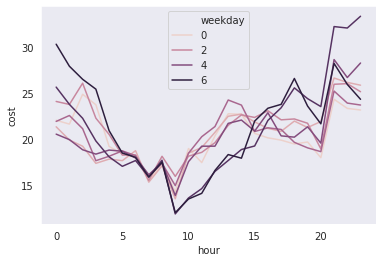

In [21]:
sns.set_style("dark")
sns.lineplot(data=df_grouped, x="hour", y="cost", hue="weekday")